##  Sentiment Analysis

### Data Exploration

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Amazon_Unlocked_Mobile_Sample.csv', index_col=[0])
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy J7 SM- J700H/DS GSM Smartphone-...,Samsung,208.00,4,"excellent product, low cost.",0.0
1,Apple iPhone 4 32GB (Black) - Verizon,Apple,69.98,5,Excellant,0.0
2,Nokia E5-00 Unlocked GSM Phone with Easy Email...,Nokia,115.00,5,terrific cell,0.0
3,Samsung Galaxy Grand Prime Dual Sim Factory Un...,Samsung Korea LTD,184.90,4,I can use the same wall plug that i have from ...,1.0
4,Lenovo S8 S898T 5.3 Inch IPS Smart Cell Phone ...,NaN,180.00,5,Excellent cell phone,0.0


In [2]:
df.shape

(289688, 6)

In [3]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
0,Samsung Galaxy J7 SM- J700H/DS GSM Smartphone-...,Samsung,208.00,4,"excellent product, low cost.",0.0,1
1,Apple iPhone 4 32GB (Black) - Verizon,Apple,69.98,5,Excellant,0.0,1
2,Nokia E5-00 Unlocked GSM Phone with Easy Email...,Nokia,115.00,5,terrific cell,0.0,1
3,Samsung Galaxy Grand Prime Dual Sim Factory Un...,Samsung Korea LTD,184.90,4,I can use the same wall plug that i have from ...,1.0,1
5,Blackberry Curve 8520 Gemini SmartPhone Unlock...,BlackBerry,39.99,1,the phone at first looks in great condition bu...,2.0,0


In [4]:
# Most ratings are positive
df['Positively Rated'].mean()

0.8713672695126893

In [5]:
# Reviews length
df['Reviews length'] = df['Reviews'].apply(lambda x : len(x.split()))

In [6]:
def average_of_tokens():
    p = df[df['Positively Rated']==1]['Reviews length'].mean()
    n = df[df['Positively Rated']==0]['Reviews length'].mean()
    return (p,n)
average_of_tokens()

(35.46818561298572, 52.061672274321715)

In [7]:
def average_char():
    p = df[df['Positively Rated']==1]['Reviews'].apply(lambda x : len(x)).mean()
    n = df[df['Positively Rated']==0]['Reviews'].apply(lambda x : len(x)).mean()
    return (p,n)
average_char()

(190.5470108954104, 276.8915813587229)

In [8]:
def average_of_digits():
    p = df[df['Positively Rated']==1]['Reviews'].str.count(r'\d').mean()
    n = df[df['Positively Rated']==0]['Reviews'].str.count(r'\d').mean()
    return (p,n)
average_of_digits()

(1.1594893635009036, 1.6270312835564464)

### Data Preprocessing

In [9]:
import contractions
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
stopwords_english = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours','ourselves', 'you', 'your', 'yours', 'yourself',
 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them',
 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'could',
 'didn', 'might', 'must', 'need', 'shan', 'should', 'wasn', 'weren', 'won', 'would']

In [11]:
def words_contaction(review):
    expanded_words = []    
    for word in review.split():
        expanded_words.append(contractions.fix(word))   
    
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [12]:
def text_processing(review, stopwords_english):

    lemmatizer = WordNetLemmatizer()
    
    review = review.lower()
     
    review = re.sub(r'https?:\/\/.*[\r\n]*', '', review)
    
    review = re.sub(r'@', '', review)
    review = re.sub('\s+', ' ', review)
    review = re.sub('\d+', ' ', review)
    review = re.sub(r'#', '', review)
    review = re.sub(r'"', '', review)
    review = words_contaction(review)
    
    review_tokens = word_tokenize(review)
    
    review_clean = []
    for word in review_tokens:
        if (word not in stopwords_english and word not in string.punctuation):  
            lemme_word = lemmatizer.lemmatize(word)  
            review_clean.append(lemme_word)
    return " ".join(review_clean)

In [13]:
df['Clean_Reviews'] = df['Reviews'].apply(lambda x : text_processing(x, stopwords_english))

In [14]:
# Example
print("Original Text:  ", df.loc[5,'Reviews'],"\n\nCleaned Text:  ",df.loc[5,'Clean_Reviews'])

Original Text:   the phone at first looks in great condition but then when i started using the phone the phone would shut off then turn back on after 2 mins of use. At first i thought it was because of the battery not charged all the way but then after the battery was charged fully it still kept on with this problem noted i got a used one. But ive had this phone before and its a great phone. i suggest getting a new one not a used one never know what ur goin to get. 

Cleaned Text:   phone first look great condition started using phone phone shut turn back min use first thought battery not charged way battery charged fully still kept problem noted got used one I phone great phone suggest getting new one not used one never know ur goin get


### Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(df['Clean_Reviews'], 
                                                    df['Positively Rated'], 
                                                    stratify=df['Positively Rated'],
                                                    random_state=0)

In [16]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 nice ✊🏾


X_train shape:  (162894,)


## Modelling

### CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [18]:
text = ["the phone at first looks in great condition but then when i started using the phone the phone would shut off"]

In [19]:
vectorizer = CountVectorizer()
vectorizer.fit(text)
print(vectorizer.vocabulary_)

{'the': 11, 'phone': 8, 'at': 0, 'first': 3, 'looks': 6, 'in': 5, 'great': 4, 'condition': 2, 'but': 1, 'then': 12, 'when': 14, 'started': 10, 'using': 13, 'would': 15, 'shut': 9, 'off': 7}


In [20]:
vector = vectorizer.transform(text)
print(vector.shape)
print(vectorizer.get_feature_names())
print(vector.toarray())

(1, 16)
['at', 'but', 'condition', 'first', 'great', 'in', 'looks', 'off', 'phone', 'shut', 'started', 'the', 'then', 'using', 'when', 'would']
[[1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1]]


In [21]:
pipe_cv_lgr = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('model', LogisticRegression())
])
pipe_cv_lgr.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('model', LogisticRegression())])

AUC:  0.8660993819302427


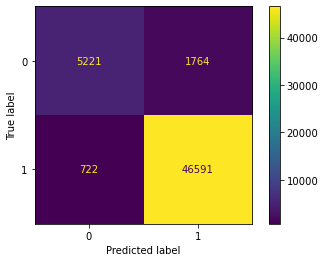

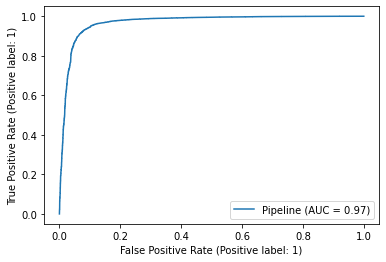

In [22]:
def performance(pipe):
    predictions = pipe.predict(X_test)
    plot_confusion_matrix(pipe, X_test, y_test);
    print('AUC: ', roc_auc_score(y_test, predictions))
    plot_roc_curve(pipe, X_test, y_test);
performance(pipe_cv_lgr)

In [23]:
print(pipe_cv_lgr['vectorizer'].get_feature_names()[::4000])
print(len(pipe_cv_lgr['vectorizer'].get_feature_names()))

['__', 'bootloaders', 'damn', 'exploration', 'hugest', 'materialsthe', 'perfectamente', 'resiliency', 'stud', 'veredicto']
38119


In [24]:
# get the feature names as numpy array
feature_names = np.array(pipe_cv_lgr['vectorizer'].get_feature_names())

# Sort the coefficients from the logistic regression model
sorted_coef_index = pipe_cv_lgr['model'].coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'nit' 'false' 'unusable' 'mony' 'luck' 'junk' 'remaining'
 'frozen' 'unsatisfied']

Largest Coefs: 
['excelent' 'excelente' 'eeeks' 'excellent' 'love' 'perfecto' 'amazed'
 'exelente' 'resistant' 'awesome']


In [25]:
pipe_cv_nb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('model', MultinomialNB(alpha=0.1))
])
pipe_cv_nb.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('model', MultinomialNB(alpha=0.1))])

AUC:  0.8498880882233262


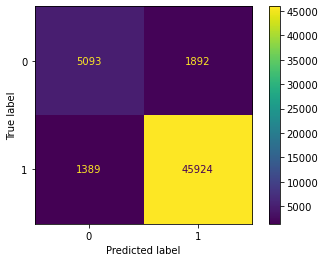

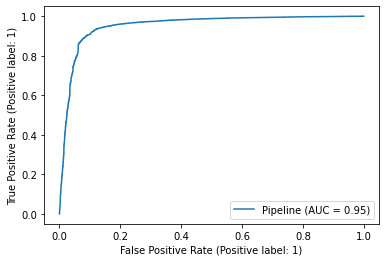

In [26]:
performance(pipe_cv_nb)

In [27]:
sentences = ["I have an issue, my phone is not working", "Good Services, I liked it"]
def custom_prediction(pipe, sentences):
    sentences = [text_processing(sent, stopwords_english) for sent in sentences]
    return pipe.predict(pd.Series(sentences))

In [28]:
custom_prediction(pipe_cv_lgr, sentences)

array([1, 1])

### Tf-idf

In [29]:
vectorizer = TfidfVectorizer().fit(text)
vectorizer.get_feature_names()

['at',
 'but',
 'condition',
 'first',
 'great',
 'in',
 'looks',
 'off',
 'phone',
 'shut',
 'started',
 'the',
 'then',
 'using',
 'when',
 'would']

In [30]:
pipe_tfidf = Pipeline([
    ('vectorizer', TfidfVectorizer(min_df=5)),
    ('model', LogisticRegression())
])
pipe_tfidf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(min_df=5)),
                ('model', LogisticRegression())])

AUC:  0.8612774677224178


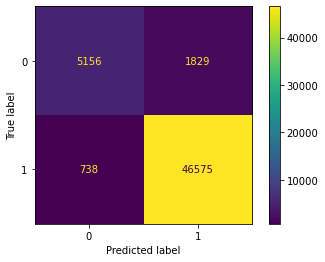

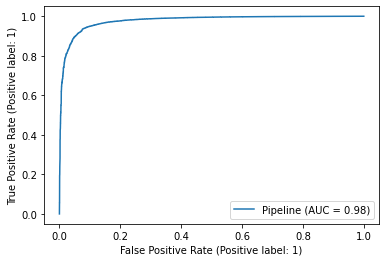

In [31]:
performance(pipe_tfidf)

In [32]:
feature_names = np.array(pipe_tfidf['vectorizer'].get_feature_names())
sorted_tfidf_index = pipe_tfidf['vectorizer'].transform(X_train).max(0).toarray()[0].argsort()

print('Smallest tfidf score:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf score: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf score:
['keynote' 'liquidating' 'tsmc' 'submarket' 'strengthened' 'srgb'
 'messiah' 'ionized' 'seizing' 'resin']

Largest tfidf score: 
['phone' 'nicee' 'esp' 'unlocked' 'never' 'new' 'especial' 'grande'
 'purchase' 'unique']


In [33]:
sorted_coef_index = pipe_tfidf['model'].coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'worst' 'waste' 'useless' 'poor' 'terrible' 'return' 'horrible'
 'returning' 'disappointed']

Largest Coefs: 
['love' 'great' 'excellent' 'perfect' 'amazing' 'awesome' 'best' 'far'
 'perfectly' 'easy']


In [34]:
custom_prediction(pipe_tfidf, sentences)

array([0, 1])

### n-grams

In [35]:
vectorizer = CountVectorizer(ngram_range=(1,2)).fit(text)
print(vectorizer.vocabulary_)

{'the': 23, 'phone': 15, 'at': 0, 'first': 6, 'looks': 12, 'in': 10, 'great': 8, 'condition': 4, 'but': 2, 'then': 25, 'when': 29, 'started': 21, 'using': 27, 'would': 31, 'shut': 19, 'off': 14, 'the phone': 24, 'phone at': 16, 'at first': 1, 'first looks': 7, 'looks in': 13, 'in great': 11, 'great condition': 9, 'condition but': 5, 'but then': 3, 'then when': 26, 'when started': 30, 'started using': 22, 'using the': 28, 'phone the': 17, 'phone would': 18, 'would shut': 32, 'shut off': 20}


In [36]:
# Fit the CountVectorizer to the training data specifiying a min document frequency of 5 and extracting 1-grams and 2-grams
pipe_cv_ngram = Pipeline([
    ('vectorizer', CountVectorizer(min_df=5, ngram_range=(1,2))),
    ('model', LogisticRegression())
])
pipe_cv_ngram.fit(X_train, y_train)
len(pipe_cv_ngram['vectorizer'].get_feature_names())

116720

AUC:  0.9200175755781406


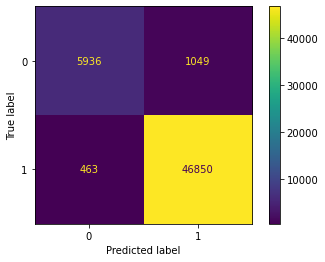

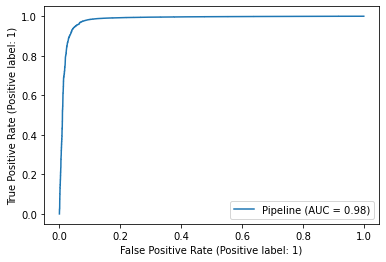

In [37]:
performance(pipe_cv_ngram)

In [38]:
feature_names = np.array(pipe_cv_ngram['vectorizer'].get_feature_names())
sorted_coef_index = pipe_cv_ngram['model'].coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'not happy' 'worst' 'not worth' 'not good' 'junk' 'horrible'
 'not satisfied' 'not recommend' 'not expected']

Largest Coefs: 
['not bad' 'excelente' 'excelent' 'excellent' 'love' 'awesome' 'perfect'
 'no problem' 'great' 'not problem']


In [39]:
custom_prediction(pipe_cv_ngram, sentences)

array([0, 1])

### Adding features

We can add features other than words, in many problems the length of text may be crucial to improve the model performance for example for a spam classifier problem number of digits, length of the document, non-word characters and number of links can help us identifying spam emails. 

In [40]:
from scipy.sparse import csr_matrix, hstack
def add_feature(X, feature_to_add):
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [42]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [43]:
# Add Features to the sparse matrix
train = add_feature(X_train_vectorized , [len(x.split()) for x in X_train])
test = add_feature(X_test_vectorized, [len(x.split()) for x in X_test])
clf = LogisticRegression(C=100).fit(train, y_train)

AUC:  0.8593254238692867


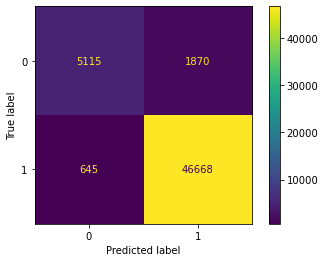

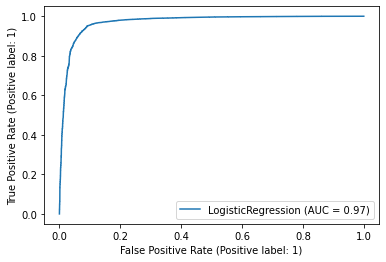

In [44]:
predictions = clf.predict(test)
plot_confusion_matrix(clf, test, y_test);
print('AUC: ', roc_auc_score(y_test, predictions))
plot_roc_curve(clf, test, y_test);

In [45]:
feature_names = np.array(vectorizer.get_feature_names() + ['len_review', ])
sorted_coef_index = clf.coef_[0].argsort()
print("small_coeffs: ", list(feature_names[sorted_coef_index[:10]]))
print("large_coeffs: ", list(feature_names[sorted_coef_index[:-11:-1]]))

small_coeffs:  ['worst', 'not good', 'horrible', 'terrible', 'not happy', 'not recommend', 'not buy', 'poor', 'disappointed', 'returning']
large_coeffs:  ['excelente', 'excelent', 'excellent', 'amazing', 'awesome', 'no problem', 'not bad', 'perfect', 'perfectly', 'great']
